In [5]:
import pandas as pd
import glob

# Path to the folder containing the CSV files
csv_files = glob.glob(r'C:\Users\Gurup\Downloads\Descriptive ass\*.csv')

# Create an empty list to hold each CSV DataFrame
all_data = []

# Iterate over each file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    all_data.append(df)

# Concatenate all the DataFrames into one
combined_data = pd.concat(all_data, ignore_index=True)

# Optionally, print the first few rows of the combined DataFrame
print(combined_data.head())

   REC_NUM  SURVYEAR  SURVMNTH  LFSSTAT  PROV  CMA  AGE_12  AGE_6  GENDER  \
0        1      2014         1        4    24    2      12    NaN     1.0   
1        2      2014         1        1    35    4       4    NaN     2.0   
2        3      2014         1        1    35    4       6    NaN     2.0   
3        4      2014         1        4    47    0      12    NaN     1.0   
4        5      2014         1        1    24    2       7    NaN     2.0   

   MARSTAT  ...  LKOTHERN  PRIORACT  YNOLOOK  TLOLOOK  SCHOOLN  EFAMTYPE  \
0        3  ...       NaN       NaN      NaN      NaN      NaN        18   
1        1  ...       NaN       NaN      NaN      NaN      1.0         8   
2        1  ...       NaN       NaN      NaN      NaN      1.0         3   
3        1  ...       NaN       NaN      NaN      NaN      NaN        11   
4        2  ...       NaN       NaN      NaN      NaN      1.0        14   

   AGYOWNK  FINALWT  Cab_Name  SEX  
0      NaN      267   01-2014  NaN  
1     

In [6]:
combined_data.shape

(14819889, 62)

In [7]:
# Unique years
print("🗓️ Unique Survey Years:", combined_data['SURVYEAR'].unique())
print("\n🔢 Value Counts by Year:")
print(combined_data['SURVYEAR'].value_counts().sort_index())

# Unique months
print("\n🗓️ Unique Survey Months:", combined_data['SURVMNTH'].unique())
print("\n🔢 Value Counts by Month:")
print(combined_data['SURVMNTH'].value_counts().sort_index())

🗓️ Unique Survey Years: [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2011]

🔢 Value Counts by Year:
SURVYEAR
2011     113780
2014    1137800
2015    1365360
2016    1365360
2017    1365360
2018    1251580
2019    1365360
2020    1365360
2021    1251580
2022    1306571
2023    1247402
2024    1343036
2025     341340
Name: count, dtype: int64

🗓️ Unique Survey Months: [ 1  2  3  4  5  6  7  8  9 10 11 12]

🔢 Value Counts by Month:
SURVMNTH
1     1225481
2     1570021
3     1230532
4     1234056
5     1233135
6     1232610
7     1234186
8     1236959
9     1127526
10    1127840
11    1127064
12    1240479
Name: count, dtype: int64


In [8]:
# Remove 2011 and 2025 rows
combined_data = combined_data[~combined_data['SURVYEAR'].isin([2011, 2025])]

# Confirm it's gone
print("✅ Unique Years After Filtering:", combined_data['SURVYEAR'].unique())

✅ Unique Years After Filtering: [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


In [9]:
# 📉 Show all missing value percentages without cutoff
pd.set_option('display.max_rows', None)

# Calculate and show missing % sorted from high to low
missing_percent = combined_data.isnull().mean() * 100
print("📉 Missing Data (%):")
print(missing_percent.sort_values(ascending=False))

# (Optional) Reset max rows setting to default later
# pd.reset_option('display.max_rows')

📉 Missing Data (%):
TLOLOOK     99.845288
LKPUBAG     99.501064
LKOTHERN    99.032898
LKRELS      98.722987
YNOLOOK     98.650775
LKANSADS    98.317571
LKEMPLOY    98.180409
LKATADS     97.124096
PRIORACT    96.379197
DURUNEMP    96.225251
FLOWUNEM    96.105889
UNEMFTPT    96.105889
AVAILABL    95.636199
PAYAWAY     95.497206
WKSAWAY     94.952651
YABSENT     94.952651
PREVTEN     93.067964
FTPTLAST    93.067964
WHYLEFTN    93.067964
WHYLEFTO    93.067964
YAWAY       92.266231
WHYPT       88.934135
AGE_6       79.943416
AGYOWNK     74.247167
SEX         72.871064
DURJLESS    65.287684
EVERWORK    58.242677
PAIDOT      53.758713
UNPAIDOT    53.758713
XTRAHRS     53.758713
HRSAWAY     53.758713
FIRMSIZE    49.665226
HRLYEARN    49.665226
UNION       49.665226
PERMTEMP    49.665226
ESTSIZE     49.665226
MJH         41.757323
AHRSMAIN    41.757323
FTPTMAIN    41.757323
UHRSMAIN    41.757323
UTOTHRS     41.757323
TENURE      41.757323
ATOTHRS     41.757323
NOC_43      34.825287
NOC_10      

In [10]:
# 🚫 Step 2: Automatically detect columns with >50% missing
drop_by_missing = missing_percent[missing_percent > 50].index.tolist()

# 🔁 Step 3: Add manually redundant or unneeded columns
manual_drop = [
    'REC_NUM',     # Unnecessary record ID
    'AGE_6',       # Duplicate of AGE_12
    'Cab_Name',    # Already encoded in SURVMNTH + SURVYEAR
    'FINALWT',     # Survey weight, not always needed
    'SEX'          # Use GENDER instead
]

# 🧹 Step 4: Merge lists and keep only those actually in the DataFrame
cols_to_drop = list(set(drop_by_missing + manual_drop))
existing_cols_to_drop = [col for col in cols_to_drop if col in combined_data.columns]

# ✅ Drop them safely
combined_data.drop(columns=existing_cols_to_drop, inplace=True)

# ✅ Step 5: Show remaining columns
print("✅ Remaining Columns After Cleanup:")
print(combined_data.columns.tolist())

✅ Remaining Columns After Cleanup:
['SURVYEAR', 'SURVMNTH', 'LFSSTAT', 'PROV', 'CMA', 'AGE_12', 'GENDER', 'MARSTAT', 'EDUC', 'MJH', 'COWMAIN', 'IMMIG', 'NAICS_21', 'NOC_10', 'NOC_43', 'UHRSMAIN', 'AHRSMAIN', 'FTPTMAIN', 'UTOTHRS', 'ATOTHRS', 'TENURE', 'HRLYEARN', 'UNION', 'PERMTEMP', 'ESTSIZE', 'FIRMSIZE', 'SCHOOLN', 'EFAMTYPE']


In [11]:
print(f"🔢 Data Shape: {combined_data.shape}")
print("📉 Missing Value Summary:")
print(combined_data.isna().sum())

🔢 Data Shape: (14364769, 28)
📉 Missing Value Summary:
SURVYEAR          0
SURVMNTH          0
LFSSTAT           0
PROV              0
CMA               0
AGE_12            0
GENDER      3897009
MARSTAT           0
EDUC              0
MJH         5998343
COWMAIN     5002572
IMMIG             0
NAICS_21    5002572
NOC_10      5002572
NOC_43      5002572
UHRSMAIN    5998343
AHRSMAIN    5998343
FTPTMAIN    5998343
UTOTHRS     5998343
ATOTHRS     5998343
TENURE      5998343
HRLYEARN    7134295
UNION       7134295
PERMTEMP    7134295
ESTSIZE     7134295
FIRMSIZE    7134295
SCHOOLN     3667781
EFAMTYPE          0
dtype: int64


In [12]:
# ✅ Safe handling of missing values for each column
for col in combined_data.columns:
    if combined_data[col].dtype in ['float64', 'int64']:
        median_val = combined_data[col].median()
        combined_data[col] = combined_data[col].fillna(median_val)
    else:
        mode_val = combined_data[col].mode()[0]
        combined_data[col] = combined_data[col].fillna(mode_val)

print("✅ Missing values filled safely and correctly.")


✅ Missing values filled safely and correctly.


In [13]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14364769 entries, 0 to 14819888
Data columns (total 28 columns):
 #   Column    Dtype  
---  ------    -----  
 0   SURVYEAR  int64  
 1   SURVMNTH  int64  
 2   LFSSTAT   int64  
 3   PROV      int64  
 4   CMA       int64  
 5   AGE_12    int64  
 6   GENDER    float64
 7   MARSTAT   int64  
 8   EDUC      int64  
 9   MJH       float64
 10  COWMAIN   float64
 11  IMMIG     int64  
 12  NAICS_21  float64
 13  NOC_10    float64
 14  NOC_43    float64
 15  UHRSMAIN  float64
 16  AHRSMAIN  float64
 17  FTPTMAIN  float64
 18  UTOTHRS   float64
 19  ATOTHRS   float64
 20  TENURE    float64
 21  HRLYEARN  float64
 22  UNION     float64
 23  PERMTEMP  float64
 24  ESTSIZE   float64
 25  FIRMSIZE  float64
 26  SCHOOLN   float64
 27  EFAMTYPE  int64  
dtypes: float64(18), int64(10)
memory usage: 3.1 GB


In [14]:
print("🔍 Any missing left? =>", combined_data.isnull().sum().sum())


🔍 Any missing left? => 0


In [15]:
# Count total duplicate rows
duplicate_count = combined_data.duplicated().sum()
print(f"🔍 Duplicate rows found: {duplicate_count}")

🔍 Duplicate rows found: 3165988


In [16]:
combined_data['GENDER'] = combined_data['GENDER'].astype('category')


In [17]:
duplicates = combined_data.duplicated().sum()
print(f"🧩 Total Duplicate Rows: {duplicates}")


🧩 Total Duplicate Rows: 3165988


In [18]:
combined_data.drop_duplicates(inplace=True)


In [19]:
print(combined_data['LFSSTAT'].value_counts())
print(combined_data['PROV'].value_counts())

LFSSTAT
1    7586593
4    2361335
2     719303
3     531550
Name: count, dtype: int64
PROV
35    3532548
24    2026648
59    1448301
48     933982
46     818275
47     648348
13     549291
12     513476
10     471142
11     256770
Name: count, dtype: int64


In [20]:
combined_data.shape

(11198781, 28)

In [21]:
combined_data.to_csv("lfs_final.csv", index=False)
print("✅ Final cleaned dataset saved!")


✅ Final cleaned dataset saved!


In [22]:
import pandas as pd

combined_data = pd.read_csv("lfs_final.csv")
# Print the shape to confirm
print(combined_data.shape)

(11198781, 28)


In [23]:
#STEP 2: Basic EDA & Filtering
print("\n💸 Earnings Range:", combined_data['HRLYEARN'].min(), "-", combined_data['HRLYEARN'].max())
print("🎂 Age Range:", combined_data['AGE_12'].min(), "-", combined_data['AGE_12'].max())
print("🕒 Usual Hours:", combined_data['UHRSMAIN'].min(), "-", combined_data['UHRSMAIN'].max())


💸 Earnings Range: 400.0 - 23590.0
🎂 Age Range: 1 - 12
🕒 Usual Hours: 1.0 - 990.0


In [24]:
# Check unique values in FTPTMAIN
print("🔍 Unique FTPTMAIN values:", combined_data['FTPTMAIN'].unique())

# Count how many are Full-time (1) and Part-time (2)
print("\n📊 Full-time vs Part-time Raw Distribution:")
print(combined_data['FTPTMAIN'].value_counts(dropna=False).sort_index())

🔍 Unique FTPTMAIN values: [1. 2.]

📊 Full-time vs Part-time Raw Distribution:
FTPTMAIN
1.0    9628428
2.0    1570353
Name: count, dtype: int64


In [25]:
# Step 1: Ensure HRLYEARN is scaled correctly (if needed)
combined_data['HRLYEARN'] = combined_data['HRLYEARN'] / 100.0

# Step 2: Create WEEKLY_EARN before filtering or analyzing
combined_data['WEEKLY_EARN'] = combined_data['HRLYEARN'] * combined_data['UHRSMAIN']

# Now it’s safe to access it:
ft_earnings = combined_data.query("FTPTMAIN == 1")['WEEKLY_EARN']
pt_earnings = combined_data.query("FTPTMAIN == 2")['WEEKLY_EARN']


In [26]:
# View full-time and part-time earnings separately
ft_earnings = combined_data.query("FTPTMAIN == 1")['WEEKLY_EARN']
pt_earnings = combined_data.query("FTPTMAIN == 2")['WEEKLY_EARN']

In [27]:
# Get percentiles
print("🎯 Full-time Weekly Earnings Percentiles:")
print(ft_earnings.quantile([0.90, 0.95, 0.99]))

print("\n🎯 Part-time Weekly Earnings Percentiles:")
print(pt_earnings.quantile([0.90, 0.95, 0.99]))

🎯 Full-time Weekly Earnings Percentiles:
0.90    20800.0
0.95    25000.0
0.99    38460.0
Name: WEEKLY_EARN, dtype: float64

🎯 Part-time Weekly Earnings Percentiles:
0.90     7500.0
0.95    10000.0
0.99    16500.0
Name: WEEKLY_EARN, dtype: float64


In [28]:
condition_ft = (combined_data['FTPTMAIN'] == 1) & (combined_data['WEEKLY_EARN'] <= 25000)
condition_pt = (combined_data['FTPTMAIN'] == 2) & (combined_data['WEEKLY_EARN'] <= 10000)
combined_data = combined_data[condition_ft | condition_pt]


In [29]:
print("\n📊 Weekly Earnings Percentiles (Cleaned):")
print(combined_data['WEEKLY_EARN'].quantile([0.01, 0.25, 0.5, 0.75, 0.95, 0.99, 1.0]))


📊 Weekly Earnings Percentiles (Cleaned):
0.01     1020.0
0.25     8636.0
0.50    11400.0
0.75    13172.0
0.95    20448.0
0.99    24000.0
1.00    25000.0
Name: WEEKLY_EARN, dtype: float64


In [30]:
# ✅ GENDER
combined_data['GENDER_LABEL'] = combined_data['GENDER'].map({
    1: 'Male', 2: 'Female'
}).fillna('Unknown')

# ✅ Full-time / Part-time
combined_data['FTPT_LABEL'] = combined_data['FTPTMAIN'].map({
    1: 'Full-time', 2: 'Part-time'
}).fillna('Unknown')

# ✅ Education Level
edu_map = {
    0: '0–8 years', 1: 'Some HS', 2: 'HS Grad',
    3: 'Some College', 4: 'Diploma',
    5: "Bachelor's", 6: 'Grad Degree'
}
combined_data['EDUC_LEVEL'] = combined_data['EDUC'].map(edu_map).fillna('Unknown')

# ✅ Province
province_map = {
    10: "NL", 11: "PEI", 12: "NS", 13: "NB", 24: "QC",
    35: "ON", 46: "MB", 47: "SK", 48: "AB", 59: "BC",
    60: "Yukon", 61: "NWT", 62: "Nunavut"
}
combined_data['PROV_NAME'] = combined_data['PROV'].map(province_map).fillna('Unknown')

# ✅ CMA
cma_map = {
    1: "Quebec", 2: "Montreal", 3: "Ottawa-Gatineau (ON)",
    4: "Toronto", 5: "Hamilton", 6: "Winnipeg",
    7: "Calgary", 8: "Edmonton", 9: "Vancouver", 0: "Other / Non-CMA"
}
combined_data['CMA_NAME'] = combined_data['CMA'].map(cma_map).fillna('Unknown')

# ✅ Immigrant Status
immig_map = {
    1: "Recent Immigrant (≤10 yrs)",
    2: "Long-term Immigrant (>10 yrs)",
    3: "Non-immigrant"
}
combined_data['IMMIG_LABEL'] = combined_data['IMMIG'].map(immig_map).fillna('Unknown')

# ✅ Labour Force Status
lfs_map = {
    1: "Employed - At Work",
    2: "Employed - Absent",
    3: "Unemployed",
    4: "Not in Labour Force"
}
combined_data['LFS_LABEL'] = combined_data['LFSSTAT'].map(lfs_map).fillna('Unknown')

# ✅ Union Status
union_map = {
    1: "Union Member",
    2: "Not Member, Covered",
    3: "Not Covered"
}
combined_data['UNION_LABEL'] = combined_data['UNION'].map(union_map).fillna('Unknown')

# ✅ Job Type
job_type_map = {
    1: "Permanent",
    2: "Temporary - Seasonal",
    3: "Temporary - Term/Contract",
    4: "Temporary - Casual/Other"
}
combined_data['JOB_TYPE_LABEL'] = combined_data['PERMTEMP'].map(job_type_map).fillna('Unknown')

# ✅ Marital Status
marstat_map = {
    1: "Married/Common-law",
    2: "Widowed",
    3: "Separated/Divorced",
    4: "Single/Never Married",
    5: "Divorced",
    6: "Single, never married"
}
combined_data['MARITAL_LABEL'] = combined_data['MARSTAT'].map(marstat_map).fillna('Unknown')

# ✅ Main Job Label
combined_data['MAIN_JOB_LABEL'] = combined_data['MJH'].map({
    1: "Main Job", 2: "Other Job"
}).fillna('Unknown')

# ✅ Worker Class (COWMAIN)
cow_map = {
    1: "Public Sector", 2: "Private Sector",
    3: "Self-Employed Inc. + Help",
    4: "Self-Employed Inc. No Help",
    5: "Self-Employed Uninc. + Help",
    6: "Self-Employed Uninc. No Help",
    7: "Unpaid Family Worker"
}
combined_data['WORKER_CLASS_LABEL'] = combined_data['COWMAIN'].map(cow_map).fillna('Unknown')

# ✅ Family Type (EFAMTYPE)
fam_map = {
    1: "Not in Economic Family",
    2: "Dual-earner, No Kids",
    3: "Dual-earner, With Kids",
    4: "Dual-earner, Adult Kids",
    5: "Single-earner (Man), No Kids",
    6: "Single-earner (Man), With Kids",
    7: "Single-earner (Man), Adult Kids",
    8: "Single-earner (Woman), No Kids",
    9: "Single-earner (Woman), With Kids",
    10: "Single-earner (Woman), Adult Kids",
    11: "Non-earner Couple, No Kids",
    12: "Non-earner Couple, With Kids",
    13: "Non-earner Couple, Adult Kids",
    14: "Lone-parent Employed, Kids",
    15: "Lone-parent Employed, Adult Kids",
    16: "Lone-parent Unemployed, Kids",
    17: "Lone-parent Unemployed, Adult Kids",
    18: "Other Families"
}
combined_data['FAMILY_TYPE_LABEL'] = combined_data['EFAMTYPE'].map(fam_map).fillna('Unknown')


In [31]:
# ✅ Loop through all columns with ascending order for value counts
for col in combined_data.columns:
    print("="*60)
    print(f"🧩 COLUMN NAME      : {col}")
    print(f"🔢 UNIQUE COUNT     : {combined_data[col].nunique(dropna=False)}")
    print(f"📋 UNIQUE VALUES    : {combined_data[col].unique()}")
    print("\n🔢 VALUE COUNTS (ASC):")
    print(combined_data[col].value_counts(dropna=False, ascending=True))


🧩 COLUMN NAME      : SURVYEAR
🔢 UNIQUE COUNT     : 11
📋 UNIQUE VALUES    : [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]

🔢 VALUE COUNTS (ASC):
SURVYEAR
2014     848070
2023     912814
2018     932877
2021     932877
2022     958674
2024     975383
2015    1017684
2016    1017684
2017    1017684
2019    1017684
2020    1017684
Name: count, dtype: int64
🧩 COLUMN NAME      : SURVMNTH
🔢 UNIQUE COUNT     : 12
📋 UNIQUE VALUES    : [ 1  2  3  4  5  6  7  8  9 10 11 12]

🔢 VALUE COUNTS (ASC):
SURVMNTH
11    749586
10    834843
9     834863
1     908721
2     911498
3     913231
6     914378
5     914613
4     915377
7     915800
8     917497
12    918708
Name: count, dtype: int64
🧩 COLUMN NAME      : LFSSTAT
🔢 UNIQUE COUNT     : 4
📋 UNIQUE VALUES    : [4 1 3 2]

🔢 VALUE COUNTS (ASC):
LFSSTAT
3     531550
2     673210
4    2361335
1    7083020
Name: count, dtype: int64
🧩 COLUMN NAME      : PROV
🔢 UNIQUE COUNT     : 10
📋 UNIQUE VALUES    : [24 35 47 48 59 12 10 13 46 11]

🔢 VALUE COU

In [32]:
# ✅ Save the cleaned and fully mapped dataset
combined_data.to_csv("After cleaning and mapping LFS DATASET.csv", index=False)
print("📁 File saved as: lfs_cleaned_mapped.csv")


📁 File saved as: lfs_cleaned_mapped.csv


In [33]:
import pandas as pd

combined_data = pd.read_csv("After cleaning and mapping LFS DATASET.csv")
combined_data.head()

,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,GENDER,MARSTAT,EDUC,MJH,...,PROV_NAME,CMA_NAME,IMMIG_LABEL,LFS_LABEL,UNION_LABEL,JOB_TYPE_LABEL,MARITAL_LABEL,MAIN_JOB_LABEL,WORKER_CLASS_LABEL,FAMILY_TYPE_LABEL
0,2014,1,4,24,2,12,1.0,3,2,1.0,...,QC,Montreal,Non-immigrant,Not in Labour Force,Not Covered,Permanent,Separated/Divorced,Main Job,Private Sector,Other Families
1,2014,1,1,35,4,4,2.0,1,6,1.0,...,ON,Toronto,Long-term Immigrant (>10 yrs),Employed - At Work,Not Covered,Permanent,Married/Common-law,Main Job,Private Sector,"Single-earner (Woman), No Kids"
2,2014,1,1,35,4,6,2.0,1,4,1.0,...,ON,Toronto,Long-term Immigrant (>10 yrs),Employed - At Work,Not Covered,Permanent,Married/Common-law,Main Job,Private Sector,"Dual-earner, With Kids"
3,2014,1,4,47,0,12,1.0,1,4,1.0,...,SK,Other / Non-CMA,Non-immigrant,Not in Labour Force,Not Covered,Permanent,Married/Common-law,Main Job,Private Sector,"Non-earner Couple, No Kids"
4,2014,1,3,48,8,2,2.0,6,3,1.0,...,AB,Edmonton,Non-immigrant,Unemployed,Not Covered,Permanent,"Single, never married",Main Job,Private Sector,"Dual-earner, Adult Kids"


In [34]:
# 💰 Earnings Groups from Weekly Earnings (works better)
combined_data['EARN_GROUP'] = pd.qcut(
    combined_data['WEEKLY_EARN'],
    q=4,
    labels=['Low', 'Mid-Low', 'Mid-High', 'High'],
    duplicates='drop'
)

In [35]:


features = [
    'AGE_12', 'EDUC_LEVEL', 'FTPT_LABEL', 'GENDER_LABEL', 'JOB_TYPE_LABEL' 
]


In [36]:
# 🧠 One-Hot Encode
clustering_data = pd.get_dummies(combined_data[features], drop_first=True)

# ✅ Check shape and sample
print("Clustering Data Shape:", clustering_data.shape)
clustering_data.head()

Clustering Data Shape: (10649115, 12)


,AGE_12,EDUC_LEVEL_Bachelor's,EDUC_LEVEL_Diploma,EDUC_LEVEL_Grad Degree,EDUC_LEVEL_HS Grad,EDUC_LEVEL_Some College,EDUC_LEVEL_Some HS,FTPT_LABEL_Part-time,GENDER_LABEL_Male,JOB_TYPE_LABEL_Temporary - Casual/Other,JOB_TYPE_LABEL_Temporary - Seasonal,JOB_TYPE_LABEL_Temporary - Term/Contract
0,12,False,False,False,True,False,False,False,True,False,False,False
1,4,False,False,True,False,False,False,False,False,False,False,False
2,6,False,True,False,False,False,False,False,False,False,False,False
3,12,False,True,False,False,False,False,False,True,False,False,False
4,2,False,False,False,False,True,False,False,False,False,False,False


In [37]:
from sklearn.preprocessing import StandardScaler

# ⚖️ Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# ✅ Convert back to DataFrame for better readability (optional)
scaled_df = pd.DataFrame(scaled_data, columns=clustering_data.columns, index=clustering_data.index)

# 🔍 Check result
print("Scaled Data Shape:", scaled_df.shape)
scaled_df.head()

Scaled Data Shape: (10649115, 12)


,AGE_12,EDUC_LEVEL_Bachelor's,EDUC_LEVEL_Diploma,EDUC_LEVEL_Grad Degree,EDUC_LEVEL_HS Grad,EDUC_LEVEL_Some College,EDUC_LEVEL_Some HS,FTPT_LABEL_Part-time,GENDER_LABEL_Male,JOB_TYPE_LABEL_Temporary - Casual/Other,JOB_TYPE_LABEL_Temporary - Seasonal,JOB_TYPE_LABEL_Temporary - Term/Contract
0,1.737014,-0.493794,-0.707107,-0.331452,2.050394,-0.262263,-0.30959,-0.403639,1.328409,-0.153804,-0.097461,-0.197319
1,-0.732713,-0.493794,-0.707107,3.017028,-0.487711,-0.262263,-0.30959,-0.403639,-0.752780,-0.153804,-0.097461,-0.197319
2,-0.115281,-0.493794,1.414213,-0.331452,-0.487711,-0.262263,-0.30959,-0.403639,-0.752780,-0.153804,-0.097461,-0.197319
3,1.737014,-0.493794,1.414213,-0.331452,-0.487711,-0.262263,-0.30959,-0.403639,1.328409,-0.153804,-0.097461,-0.197319
4,-1.350145,-0.493794,-0.707107,-0.331452,-0.487711,3.812966,-0.30959,-0.403639,-0.752780,-0.153804,-0.097461,-0.197319


In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



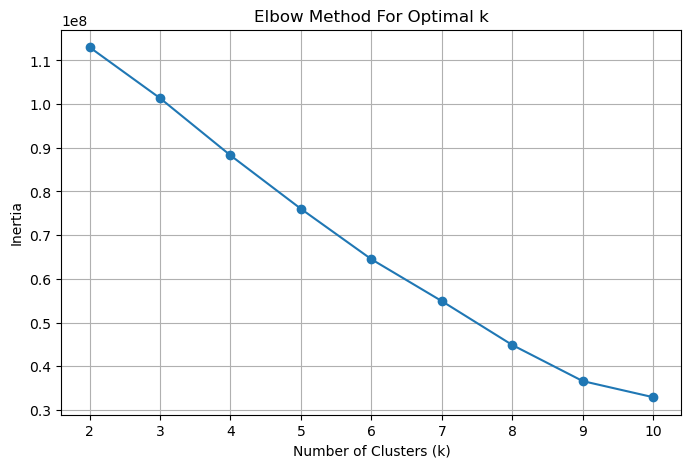

In [39]:
# 🔢 Try k values from 2 to 10
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# 📉 Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [40]:
# Final KMeans with 9 clusters
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=9, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(scaled_df)

# Add cluster labels to original combined_data
combined_data['CLUSTER'] = cluster_labels

# Preview
print("📌 Cluster label counts:")
print(combined_data['CLUSTER'].value_counts())


📌 Cluster label counts:
CLUSTER
1    3632009
0    1929381
3    1917132
2     960229
4     853261
5     611729
8     399083
6     246091
7     100200
Name: count, dtype: int64


In [41]:
# Sample from scaled data
sample_size = 10000
X_sample = scaled_df.sample(n=sample_size, random_state=42)
sample_indices = X_sample.index

# Match rows from combined_data
combined_sample = combined_data.loc[sample_indices].copy()

In [42]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(X_sample)

# Add t-SNE results to the combined_sample DataFrame
combined_sample['TSNE_1'] = tsne_result[:, 0]
combined_sample['TSNE_2'] = tsne_result[:, 1]

C:\Users\Gurup\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


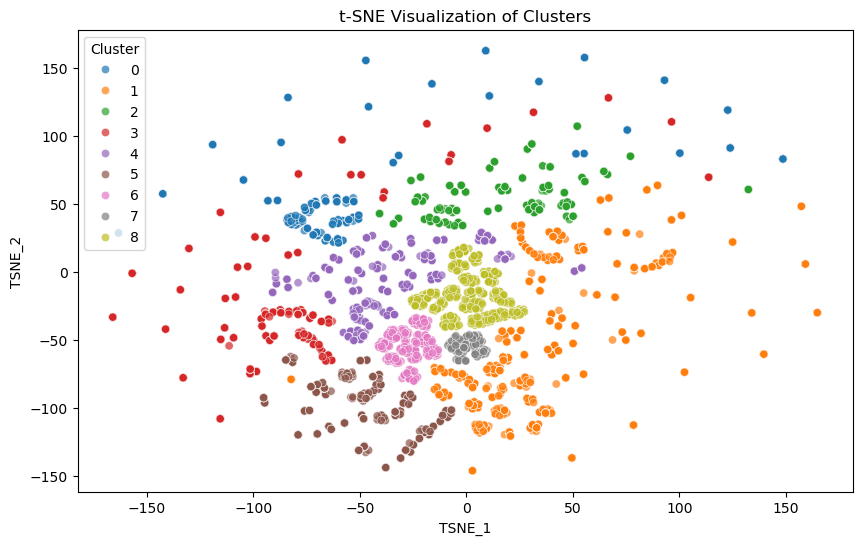

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_sample, x='TSNE_1', y='TSNE_2', hue='CLUSTER', palette='tab10', alpha=0.7)
plt.title("t-SNE Visualization of Clusters")
plt.legend(title='Cluster')
plt.show()


In [44]:
from sklearn.metrics import silhouette_score

# 🔽 Take a sample of 20,000 rows
sampled_df = scaled_df.sample(n=50000, random_state=42)
sampled_labels = combined_data.loc[sampled_df.index, 'CLUSTER']

# ✅ Compute on sample
score = silhouette_score(sampled_df, sampled_labels)
print("📊 Approximate Silhouette Score (sampled):", round(score, 4))


📊 Approximate Silhouette Score (sampled): 0.4773


In [45]:
# Example: Distribution of Education Level by Cluster
educ_dist = pd.crosstab(combined_data['CLUSTER'], combined_data['EDUC_LEVEL'], normalize='index') * 100
educ_dist.round(1)


EDUC_LEVEL,0–8 years,Bachelor's,Diploma,Grad Degree,HS Grad,Some College,Some HS
CLUSTER,,,,,,,
0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
1,7.8,0.0,92.2,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,100.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,100.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,100.0
5,0.0,0.0,0.0,0.0,0.0,100.0,0.0
6,1.5,16.6,24.9,7.1,21.0,12.7,16.2
7,3.1,9.1,29.8,3.5,24.2,10.0,20.2
8,0.7,27.1,28.0,18.3,13.3,8.1,4.5


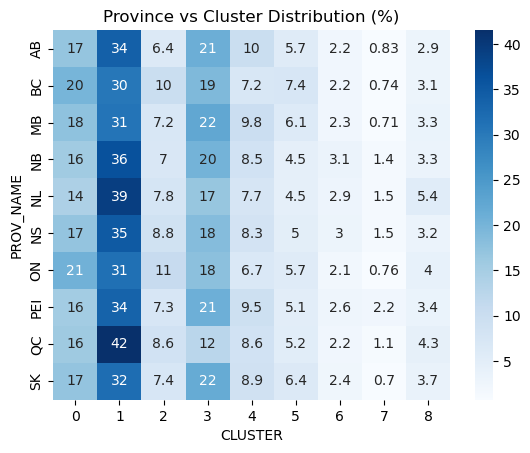

In [46]:
province_dist = pd.crosstab(combined_data['PROV_NAME'], combined_data['CLUSTER'], normalize='index') * 100
sns.heatmap(province_dist, annot=True, cmap='Blues')
plt.title("Province vs Cluster Distribution (%)")
plt.show()

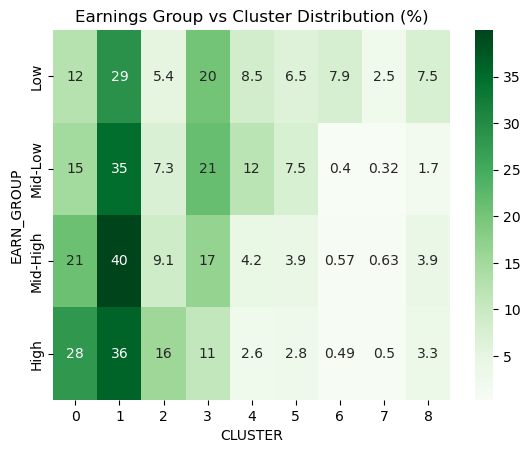

In [47]:
earn_group_dist = pd.crosstab(combined_data['EARN_GROUP'], combined_data['CLUSTER'], normalize='index') * 100
sns.heatmap(earn_group_dist, annot=True, cmap='Greens')
plt.title("Earnings Group vs Cluster Distribution (%)")
plt.show()

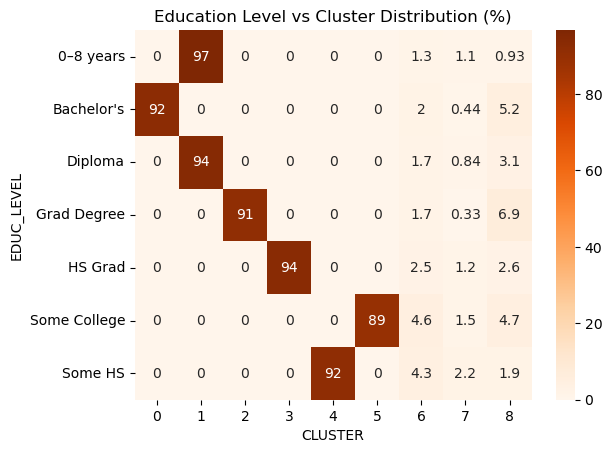

In [48]:
educ_dist = pd.crosstab(combined_data['EDUC_LEVEL'], combined_data['CLUSTER'], normalize='index') * 100
sns.heatmap(educ_dist, annot=True, cmap='Oranges')
plt.title("Education Level vs Cluster Distribution (%)")
plt.show()

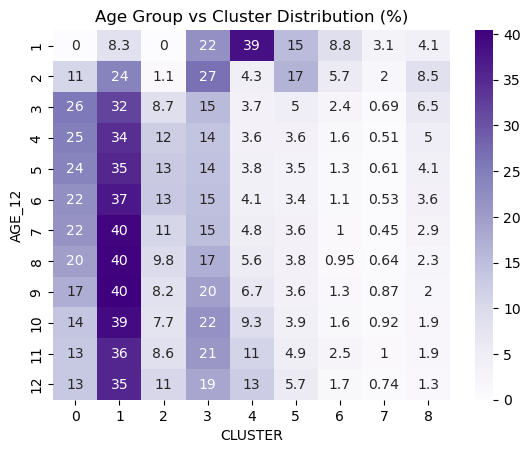

In [49]:
age_dist = pd.crosstab(combined_data['AGE_12'], combined_data['CLUSTER'], normalize='index') * 100
sns.heatmap(age_dist, annot=True, cmap='Purples')
plt.title("Age Group vs Cluster Distribution (%)")
plt.show()

In [50]:
pd.crosstab(combined_data['CLUSTER'], combined_data['LFS_LABEL'], normalize='index') * 100


LFS_LABEL,Employed - Absent,Employed - At Work,Not in Labour Force,Unemployed
CLUSTER,,,,
0,6.934763,72.562703,16.224841,4.277693
1,6.646459,68.192259,20.383760,4.777521
2,6.757138,71.094603,17.671201,4.477057
3,5.565501,59.994565,27.908929,6.531006
4,4.739347,43.256635,43.784610,8.219408
5,4.745565,51.641985,37.536883,6.075566
6,9.444880,90.555120,0.000000,0.000000
7,7.682635,92.317365,0.000000,0.000000
8,6.519947,93.480053,0.000000,0.000000


C:\Users\Gurup\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


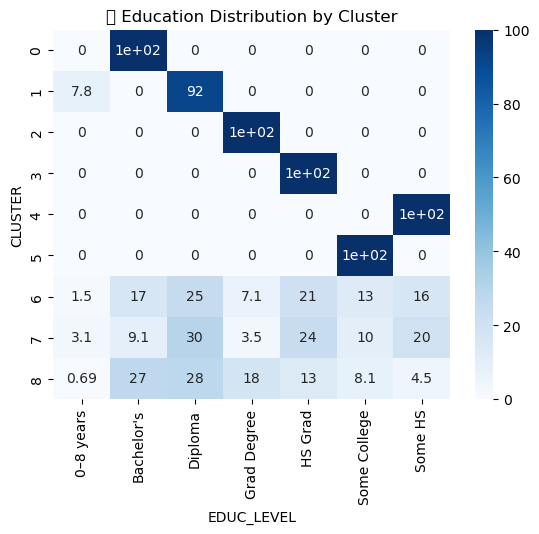

In [51]:
edu_dist = pd.crosstab(combined_data['CLUSTER'], combined_data['EDUC_LEVEL'], normalize='index') * 100
sns.heatmap(edu_dist, annot=True, cmap='Blues')
plt.title("🎓 Education Distribution by Cluster")
plt.show()


C:\Users\Gurup\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128118 (\N{BABY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


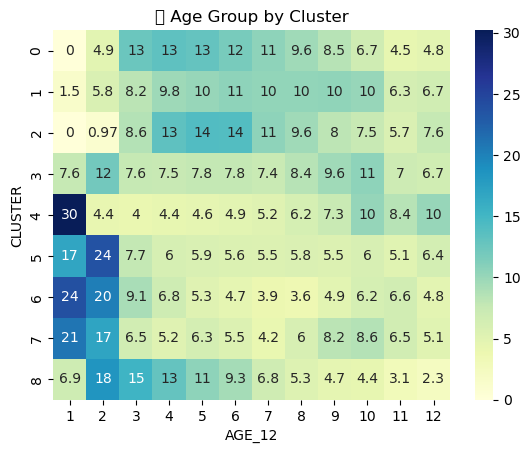

In [52]:
age_dist = pd.crosstab(combined_data['CLUSTER'], combined_data['AGE_12'], normalize='index') * 100
sns.heatmap(age_dist, annot=True, cmap='YlGnBu')
plt.title("👶 Age Group by Cluster")
plt.show()


In [53]:
gender_dist = pd.crosstab(combined_data['CLUSTER'], combined_data['GENDER_LABEL'], normalize='index') * 100
print(gender_dist)


GENDER_LABEL     Female       Male
CLUSTER                           
0             68.590755  31.409245
1             63.060774  36.939226
2             67.357370  32.642630
3             59.905734  40.094266
4             58.596490  41.403510
5             60.687167  39.312833
6             69.942826  30.057174
7             67.864271  32.135729
8             69.385817  30.614183


In [54]:
ftpt_dist = pd.crosstab(combined_data['CLUSTER'], combined_data['FTPT_LABEL'], normalize='index') * 100
print(ftpt_dist)


FTPT_LABEL  Full-time  Part-time
CLUSTER                         
0           90.651147   9.348853
1           89.759497  10.240503
2           90.932163   9.067837
3           87.481092  12.518908
4           82.954922  17.045078
5           81.507007  18.492993
6           27.503241  72.496759
7           57.530938  42.469062
8           66.670091  33.329909


In [55]:
jobtype_dist = pd.crosstab(combined_data['CLUSTER'], combined_data['JOB_TYPE_LABEL'], normalize='index') * 100
print(jobtype_dist)



JOB_TYPE_LABEL  Permanent  Temporary - Casual/Other  Temporary - Seasonal  \
CLUSTER                                                                     
0                   100.0                       0.0                   0.0   
1                   100.0                       0.0                   0.0   
2                   100.0                       0.0                   0.0   
3                   100.0                       0.0                   0.0   
4                   100.0                       0.0                   0.0   
5                   100.0                       0.0                   0.0   
6                     0.0                     100.0                   0.0   
7                     0.0                       0.0                 100.0   
8                     0.0                       0.0                   0.0   

JOB_TYPE_LABEL  Temporary - Term/Contract  
CLUSTER                                    
0                                     0.0  
1                   

C:\Users\Gurup\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128107 (\N{MAN AND WOMAN HOLDING HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


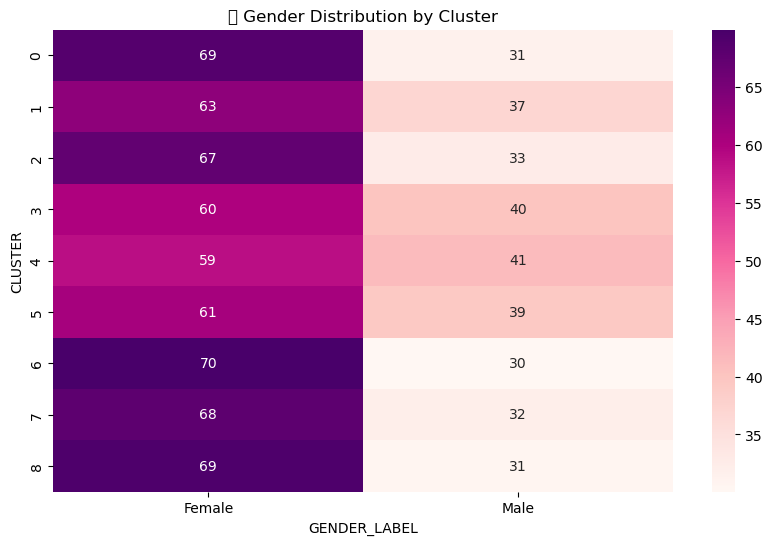

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(gender_dist, annot=True, cmap='RdPu')
plt.title("👫 Gender Distribution by Cluster")
plt.show()

In [57]:
cluster_counts = combined_data['CLUSTER'].value_counts().sort_index()
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['CLUSTER', 'Population Count']
display(cluster_counts_df)


,CLUSTER,Population Count
0,0,1929381
1,1,3632009
2,2,960229
3,3,1917132
4,4,853261
5,5,611729
6,6,246091
7,7,100200
8,8,399083


In [58]:
prov_dist = pd.crosstab(combined_data['CLUSTER'], combined_data['PROV_NAME'], normalize='index') * 100
display(prov_dist)


PROV_NAME,AB,BC,MB,NB,NL,NS,ON,PEI,QC,SK
CLUSTER,,,,,,,,,,
0,7.519666,14.105819,7.226204,4.374045,3.263067,4.398250,35.464639,2.024639,16.163630,5.460041
1,8.074292,11.413353,6.699846,5.380053,4.782587,4.806100,28.753618,2.327224,22.337362,5.425565
2,5.734778,14.344807,5.967014,3.916982,3.591643,4.586823,37.707880,1.915168,17.480622,4.754283
3,9.481142,13.644392,9.214493,5.667998,3.864001,4.811145,30.874921,2.735962,12.719886,6.986060
4,10.073002,11.512890,9.142689,5.385222,3.999362,4.842012,26.154717,2.794456,19.671003,6.424646
5,8.094761,16.497501,7.892057,3.979867,3.270239,4.056862,30.942787,2.110085,16.692359,6.463483
6,7.756480,11.991905,7.259103,6.890134,5.277722,6.114811,28.154626,2.689249,17.762535,6.103433
7,7.126747,10.127745,5.630739,7.462076,6.618762,7.247505,25.039920,5.631737,20.782435,4.332335
8,6.348053,10.587522,6.471336,4.386556,5.972692,3.952311,33.376015,2.132389,21.080828,5.692300


In [59]:
earn_group_dist = pd.crosstab(combined_data['CLUSTER'], combined_data['EARN_GROUP'], normalize='index') * 100
display(earn_group_dist)


EARN_GROUP,Low,Mid-Low,Mid-High,High
CLUSTER,,,,
0,17.154517,33.882266,10.216385,38.746831
1,21.297111,42.015122,10.327342,26.360425
2,14.938728,33.195623,8.846848,43.018801
3,28.125919,48.750269,8.170590,14.953222
4,26.545570,60.737102,4.626603,8.090725
5,28.195165,53.705644,6.030285,12.068906
6,85.318845,7.181490,2.184151,5.315513
7,66.882236,13.865269,5.933134,13.319361
8,49.941491,18.795088,9.210114,22.053307


In [60]:
# Example if column exists
if 'HRLYEARN' in combined_data.columns:
    combined_data['HOURS_GROUP'] = pd.qcut(combined_data['HRLYEARN'], q=4, labels=["Low", "Mid-Low", "Mid-High", "High"])
    hour_dist = pd.crosstab(combined_data['CLUSTER'], combined_data['HOURS_GROUP'], normalize='index') * 100
    display(hour_dist)


HOURS_GROUP,Low,Mid-Low,Mid-High,High
CLUSTER,,,,
0,16.391993,40.764214,2.965874,39.877919
1,22.589261,48.069016,3.518549,25.823174
2,11.409049,45.823340,1.942245,40.825366
3,31.995867,52.947111,2.445841,12.611182
4,28.208602,64.906752,1.222018,5.662628
5,29.071043,57.863368,2.078044,10.987545
6,75.244930,9.242110,2.171554,13.341406
7,73.760479,10.823353,2.824351,12.591816
8,47.910585,15.275770,5.203679,31.609966


In [61]:
# Example if you have weekly or hourly earnings
combined_data.groupby('CLUSTER')['HRLYEARN'].mean()


CLUSTER
0    34.790389
1    31.052294
2    36.323355
3    28.022768
4    27.218580
5    28.134722
6    23.228456
7    22.895984
8    29.337637
Name: HRLYEARN, dtype: float64

In [62]:
import pandas as pd

# ✅ Select relevant features for Power BI visualization
export_df = combined_data[[
    'CLUSTER',
    'AGE_12',
    'EDUC_LEVEL',
    'EARN_GROUP',
    'LFS_LABEL',
    'PROV_NAME',
    'GENDER_LABEL',
    'FTPT_LABEL',
    'JOB_TYPE_LABEL'
]].copy()

# ✅ Optional: Rename columns for Power BI friendliness
export_df.rename(columns={
    'CLUSTER': 'Cluster',
    'AGE_12': 'Age Group',
    'EDUC_LEVEL': 'Education Level',
    'EARN_GROUP': 'Earnings Group',
    'LFS_LABEL': 'Employment Status',
    'PROV_NAME': 'Province',
    'GENDER_LABEL': 'Gender',
    'FTPT_LABEL': 'Work Type',
    'JOB_TYPE_LABEL': 'Job Type'
}, inplace=True)

# ✅ Export to CSV
export_path = "BI_LFS_summary.csv"
export_df.to_csv(export_path, index=False)

print("✅ Power BI dataset saved as:", export_path)

✅ Power BI dataset saved as: BI_LFS_summary.csv


In [63]:
cluster_summary = combined_data.groupby('CLUSTER').agg({
    'WEEKLY_EARN': ['mean', 'median'],
    'HRLYEARN': ['mean', 'median'],
    'UHRSMAIN': 'mean',
    'AGE_12': 'mean',
    'PROV_NAME': lambda x: x.mode().iloc[0],
    'EDUC_LEVEL': lambda x: x.mode().iloc[0],
    'EARN_GROUP': lambda x: x.mode().iloc[0]
}).round(2)

# Rename for better readability
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary = cluster_summary.reset_index()

print(cluster_summary)


   CLUSTER  WEEKLY_EARN_mean  WEEKLY_EARN_median  HRLYEARN_mean  \
0        0          12801.89             11400.0          34.79   
1        1          11594.76             11400.0          31.05   
2        2          13428.38             12000.0          36.32   
3        3          10411.91             11400.0          28.02   
4        4           9812.32             11400.0          27.22   
5        5          10036.17             11400.0          28.13   
6        6           4768.43              3520.0          23.23   
7        7           7148.79              6300.0          22.90   
8        8           9110.69              8640.0          29.34   

   HRLYEARN_median  UHRSMAIN_mean  AGE_12_mean PROV_NAME_<lambda>  \
0             30.0         366.02         6.36                 ON   
1             30.0         370.04         6.89                 ON   
2             30.0         369.37         6.88                 ON   
3             30.0         365.49         6.39       

C:\Users\Gurup\AppData\Local\Temp\ipykernel_21952\1253582769.py:21: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  plt.tight_layout()
C:\Users\Gurup\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


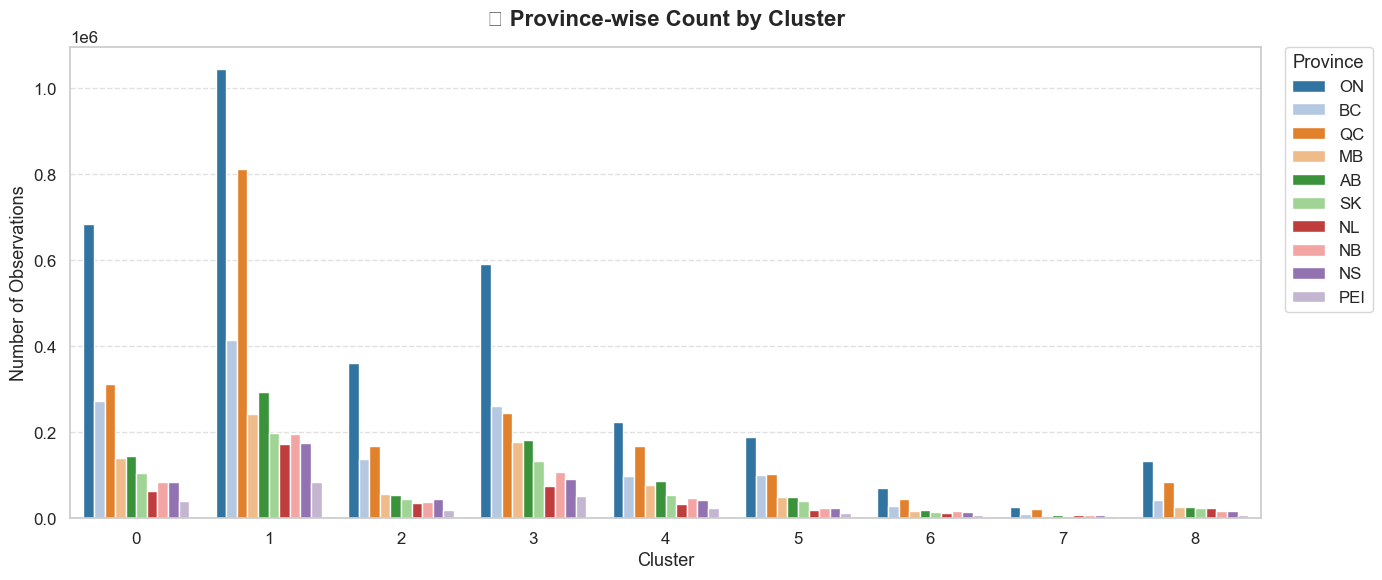

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📍 Province-wise Count by Cluster
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid", font_scale=1.1)

sns.countplot(
    data=combined_data,
    x='CLUSTER',
    hue='PROV_NAME',
    palette='tab20'
)

plt.title("📍 Province-wise Count by Cluster", fontsize=16, weight='bold', pad=15)
plt.xlabel("Cluster", fontsize=13)
plt.ylabel("Number of Observations", fontsize=13)
plt.legend(title="Province", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [65]:
# Start from your current cluster_summary (assumed already computed)

# Step 1: Drop weak or empty columns (e.g., HRLYEARN which is all 0)
cluster_summary = cluster_summary.drop(columns=['HRLYEARN_mean', 'HRLYEARN_median'], errors='ignore')

# Step 2: Add clear key insight summary per cluster (customize as needed)
cluster_summary['Key_Finding'] = [
    "High earners, highly educated professionals",
    "Mid-career diploma holders with steady income",
    "Highly educated with top weekly earnings",
    "Moderate earners with HS background",
    "Low labour force participation, some HS education",
    "Mid-low earners with college background",
    "Low earners, low hours — underemployed",
    "Working poor group with diploma",
    "Similar to 7 — needs intervention"
]

# Step 3: Keep only the strongest columns for Power BI presentation
cluster_summary = cluster_summary[[
    'CLUSTER',
    'WEEKLY_EARN_mean',
    'WEEKLY_EARN_median',
    'UHRSMAIN_mean',
    'AGE_12_mean',
    'EDUC_LEVEL_<lambda>',
    'EARN_GROUP_<lambda>',
    'LFS_LABEL_<lambda>',
    'Key_Finding'
]]

# Step 4: Rename for Power BI-friendly headers
cluster_summary.columns = [
    'Cluster',
    'Avg_Weekly_Earnings',
    'Median_Weekly_Earnings',
    'Avg_Weekly_Hours',
    'Avg_Age_Code',
    'Top_Education_Level',
    'Earnings_Quartile',
    'Employment_Status',
    'Key_Finding'
]

# Step 5: Export to CSV (optional)
# cluster_summary.to_csv("PowerBI_Cluster_Summary_Final.csv", index=False)

# Show final clean table
print(cluster_summary)


KeyError: "['LFS_LABEL_<lambda>'] not in index"

In [66]:
cluster_counts = combined_data['CLUSTER'].value_counts().sort_index().reset_index()
cluster_counts.columns = ['Cluster', 'Population_Size']
print(cluster_counts)


   Cluster  Population_Size
0        0          1929381
1        1          3632009
2        2           960229
3        3          1917132
4        4           853261
5        5           611729
6        6           246091
7        7           100200
8        8           399083


In [68]:
edu_cluster = pd.crosstab(combined_data['CLUSTER'], combined_data['EDUC_LEVEL'], normalize='index').round(2) * 100
edu_cluster.reset_index(inplace=True)
print(edu_cluster)


EDUC_LEVEL  CLUSTER  0–8 years  Bachelor's  Diploma  Grad Degree  HS Grad  \
0                 0        0.0       100.0      0.0          0.0      0.0   
1                 1        8.0         0.0     92.0          0.0      0.0   
2                 2        0.0         0.0      0.0        100.0      0.0   
3                 3        0.0         0.0      0.0          0.0    100.0   
4                 4        0.0         0.0      0.0          0.0      0.0   
5                 5        0.0         0.0      0.0          0.0      0.0   
6                 6        2.0        17.0     25.0          7.0     21.0   
7                 7        3.0         9.0     30.0          4.0     24.0   
8                 8        1.0        27.0     28.0         18.0     13.0   

EDUC_LEVEL  Some College  Some HS  
0                    0.0      0.0  
1                    0.0      0.0  
2                    0.0      0.0  
3                    0.0      0.0  
4                    0.0    100.0  
5            

In [69]:
emp_cluster = pd.crosstab(combined_data['CLUSTER'], combined_data['LFS_LABEL'], normalize='index').round(2) * 100
emp_cluster.reset_index(inplace=True)
print(emp_cluster)


LFS_LABEL  CLUSTER  Employed - Absent  Employed - At Work  \
0                0                7.0                73.0   
1                1                7.0                68.0   
2                2                7.0                71.0   
3                3                6.0                60.0   
4                4                5.0                43.0   
5                5                5.0                52.0   
6                6                9.0                91.0   
7                7                8.0                92.0   
8                8                7.0                93.0   

LFS_LABEL  Not in Labour Force  Unemployed  
0                         16.0         4.0  
1                         20.0         5.0  
2                         18.0         4.0  
3                         28.0         7.0  
4                         44.0         8.0  
5                         38.0         6.0  
6                          0.0         0.0  
7                          0.

In [70]:
prov_cluster = pd.crosstab(combined_data['PROV_NAME'], combined_data['CLUSTER'], normalize='index').round(2) * 100
prov_cluster.reset_index(inplace=True)
print(prov_cluster)


CLUSTER PROV_NAME     0     1     2     3     4    5    6    7    8
0              AB  17.0  34.0   6.0  21.0  10.0  6.0  2.0  1.0  3.0
1              BC  20.0  30.0  10.0  19.0   7.0  7.0  2.0  1.0  3.0
2              MB  18.0  31.0   7.0  22.0  10.0  6.0  2.0  1.0  3.0
3              NB  16.0  36.0   7.0  20.0   9.0  5.0  3.0  1.0  3.0
4              NL  14.0  39.0   8.0  17.0   8.0  5.0  3.0  1.0  5.0
5              NS  17.0  35.0   9.0  18.0   8.0  5.0  3.0  1.0  3.0
6              ON  21.0  31.0  11.0  18.0   7.0  6.0  2.0  1.0  4.0
7             PEI  16.0  34.0   7.0  21.0   9.0  5.0  3.0  2.0  3.0
8              QC  16.0  42.0   9.0  12.0   9.0  5.0  2.0  1.0  4.0
9              SK  17.0  32.0   7.0  22.0   9.0  6.0  2.0  1.0  4.0


In [71]:
pd.crosstab(combined_data['CLUSTER'], combined_data['EDUC_LEVEL'], normalize='index') * 100


EDUC_LEVEL,0–8 years,Bachelor's,Diploma,Grad Degree,HS Grad,Some College,Some HS
CLUSTER,,,,,,,
0,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,7.847998,0.000000,92.152002,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
6,1.539268,16.578827,24.870881,7.103064,21.011740,12.690021,16.206200
7,3.122754,9.149701,29.838323,3.500998,24.202595,10.028942,20.156687
8,0.685822,27.120925,27.972878,18.265373,13.329558,8.098817,4.526627


In [72]:
overview_summary = combined_data.groupby('Cluster').agg({
    'WEEKLY_EARN': ['mean', 'median'],
    'UHRSMAIN': 'mean',
    'AGE_12': 'mean',
    'Cluster': 'count'
}).rename(columns={
    'mean': 'Avg_Weekly_Earnings',
    'median': 'Median_Weekly_Earnings',
    'count': 'Population_Size'
})

# Optional: Add pre-defined key findings
overview_summary['Key_Finding'] =  [
    "High earners, highly educated professionals",
    "Mid-career diploma holders with steady income",
    "Highly educated with top weekly earnings",
    "Moderate earners with HS background",
    "Low labour force participation, some HS education",
    "Mid-low earners with college background",
    "Low earners, low hours — underemployed",
    "Working poor group with diploma",
    "Similar to 7 — needs intervention"
]

overview_summary.to_csv("Page1_Overview_Summary.csv", index=False)



KeyError: 'Cluster'

In [75]:
print(cluster_summary.columns.tolist())


['CLUSTER', 'WEEKLY_EARN_mean', 'WEEKLY_EARN_median', 'UHRSMAIN_mean', 'AGE_12_mean', 'PROV_NAME_<lambda>', 'EDUC_LEVEL_<lambda>', 'EARN_GROUP_<lambda>', 'Key_Finding']


In [77]:
pd.crosstab(combined_data['CLUSTER'], combined_data['LFS_LABEL'], normalize='index') * 100


LFS_LABEL,Employed - Absent,Employed - At Work,Not in Labour Force,Unemployed
CLUSTER,,,,
0,6.934763,72.562703,16.224841,4.277693
1,6.646459,68.192259,20.383760,4.777521
2,6.757138,71.094603,17.671201,4.477057
3,5.565501,59.994565,27.908929,6.531006
4,4.739347,43.256635,43.784610,8.219408
5,4.745565,51.641985,37.536883,6.075566
6,9.444880,90.555120,0.000000,0.000000
7,7.682635,92.317365,0.000000,0.000000
8,6.519947,93.480053,0.000000,0.000000


In [79]:
lfs_dist = pd.crosstab(combined_data['CLUSTER'], combined_data['LFS_LABEL'], normalize='index') * 100
lfs_dist.reset_index().to_csv("Page5_LFS_LABEL.csv", index=False)


In [81]:
page1 = combined_data.groupby('CLUSTER').agg({
    'WEEKLY_EARN': ['mean', 'median'],
    'UHRSMAIN': 'mean',
    'AGE_12': 'mean'
}).reset_index()

page1.columns = ['Cluster', 'Avg_Weekly_Earnings', 'Median_Weekly_Earnings', 'Avg_Weekly_Hours', 'Avg_Age_Code']

# Add key finding manually (edit below as needed)
page1['Key_Finding'] = [
    "High earners, highly educated professionals",
    "Mid-career diploma holders with steady income",
    "Highly educated with top weekly earnings",
    "Moderate earners with HS background",
    "Low labour force participation, some HS education",
    "Mid-low earners with college background",
    "Low earners, low hours — underemployed",
    "Working poor group with diploma",
    "Similar to 7 — needs intervention"
]

page1.to_csv("Page1_Overview.csv", index=False)


In [83]:
page2 = combined_data.groupby('CLUSTER')[['WEEKLY_EARN', 'UHRSMAIN']].mean().reset_index()
page2.columns = ['Cluster', 'Avg_Weekly_Earnings', 'Avg_Weekly_Hours']
page2.to_csv("Page2_Earnings_Hours.csv", index=False)


In [85]:
page3 = pd.crosstab(combined_data['CLUSTER'], combined_data['EDUC_LEVEL'], normalize='index') * 100
page3.reset_index().to_csv("Page3_Education_Cluster.csv", index=False)


In [87]:
page4 = pd.crosstab(combined_data['PROV_NAME'], combined_data['CLUSTER'], normalize='index') * 100
page4.reset_index().to_csv("Page4_Province_Cluster.csv", index=False)


In [99]:
# LFS Label (Employment Status)
page5_lfs = pd.crosstab(combined_data['CLUSTER'], combined_data['LFS_LABEL'], normalize='index') * 100
page5_lfs.reset_index().to_csv("Page5_LFS_Status.csv", index=False)

# FT/PT Status
page5_ftpt = pd.crosstab(combined_data['CLUSTER'], combined_data['FTPT_LABEL'], normalize='index') * 100
page5_ftpt.reset_index().to_csv("Page5_FTPT_Status.csv", index=False)

# ✅ FIXED: Job Type (use correct column name)
page5_job = pd.crosstab(combined_data['CLUSTER'], combined_data['JOB_TYPE_LABEL'], normalize='index') * 100
page5_job.reset_index().to_csv("Page5_Job_Type.csv", index=False)


In [91]:
# Age Distribution
page6_age = pd.crosstab(combined_data['AGE_12'], combined_data['CLUSTER'], normalize='index') * 100
page6_age.reset_index().to_csv("Page6_Age_Cluster.csv", index=False)

# Gender Distribution
page6_gender = pd.crosstab(combined_data['CLUSTER'], combined_data['GENDER'], normalize='index') * 100
page6_gender.reset_index().to_csv("Page6_Gender_Cluster.csv", index=False)


In [93]:
# Earnings Group
page7_earn = pd.crosstab(combined_data['EARN_GROUP'], combined_data['CLUSTER'], normalize='index') * 100
page7_earn.reset_index().to_csv("Page7_Earnings_Group.csv", index=False)

# Hours Group
page7_hours = pd.crosstab(combined_data['HOURS_GROUP'], combined_data['CLUSTER'], normalize='index') * 100
page7_hours.reset_index().to_csv("Page7_Hours_Group.csv", index=False)


In [95]:
page8 = pd.DataFrame({
    'Cluster': list(range(9)),
    'Persona': [
        "High-income professionals", "Steady diploma earners", "Top grad earners",
        "Moderate HS earners", "Low-labor force, some HS", "Mid-low college earners",
        "Underemployed youth", "Working poor (diploma)", "At-risk duplicate of 7"
    ],
    'Recommendation': [
        "Maintain growth", "Upskill", "Promote grad education",
        "Support HS transitions", "Labour market activation", "Career pathways programs",
        "Part-time to full-time policies", "Income boost", "Urgent upskilling"
    ]
})

page8.to_csv("Page8_Recommendations.csv", index=False)


In [97]:
print(combined_data.columns.tolist())


['SURVYEAR', 'SURVMNTH', 'LFSSTAT', 'PROV', 'CMA', 'AGE_12', 'GENDER', 'MARSTAT', 'EDUC', 'MJH', 'COWMAIN', 'IMMIG', 'NAICS_21', 'NOC_10', 'NOC_43', 'UHRSMAIN', 'AHRSMAIN', 'FTPTMAIN', 'UTOTHRS', 'ATOTHRS', 'TENURE', 'HRLYEARN', 'UNION', 'PERMTEMP', 'ESTSIZE', 'FIRMSIZE', 'SCHOOLN', 'EFAMTYPE', 'WEEKLY_EARN', 'GENDER_LABEL', 'FTPT_LABEL', 'EDUC_LEVEL', 'PROV_NAME', 'CMA_NAME', 'IMMIG_LABEL', 'LFS_LABEL', 'UNION_LABEL', 'JOB_TYPE_LABEL', 'MARITAL_LABEL', 'MAIN_JOB_LABEL', 'WORKER_CLASS_LABEL', 'FAMILY_TYPE_LABEL', 'EARN_GROUP', 'CLUSTER', 'HOURS_GROUP']


In [108]:
# Ensure float type
combined_data['UHRSMAIN'] = combined_data['UHRSMAIN'].astype(float)

# Group and aggregate
cluster_summary = combined_data.groupby('CLUSTER').agg({
    'WEEKLY_EARN': ['mean', 'median'],
    'UHRSMAIN': 'mean',
    'AGE_12': 'mean'
})

# Flatten multi-level columns
cluster_summary.columns = [
    'Avg_Weekly_Earnings',
    'Median_Weekly_Earnings',
    'Avg_Weekly_Hours',
    'Avg_Age_Code'
]

# Reset index for clean CSV
cluster_summary.reset_index(inplace=True)


In [110]:
cluster_summary['Key_Finding'] = [
    "High earners, highly educated professionals",
    "Mid-career diploma holders with steady income",
    "Highly educated with top weekly earnings",
    "Moderate earners with HS background",
    "Low labour force participation, some HS education",
    "Mid-low earners with college background",
    "Low earners, low hours — underemployed",
    "Working poor group with diploma",
    "Similar to 7 — needs intervention"
]

In [112]:
cluster_summary.to_csv("Page1_Overview_Corrected.csv", index=False)


In [114]:
# Step 1: Group and aggregate
cluster_summary = combined_data.groupby('CLUSTER').agg({
    'WEEKLY_EARN': ['mean', 'median'],
    'UHRSMAIN': 'mean',
    'AGE_12': 'mean'
})

# Step 2: Flatten column names
cluster_summary.columns = [
    'Avg_Weekly_Earnings',
    'Median_Weekly_Earnings',
    'Avg_Weekly_Hours',
    'Avg_Age_Code'
]
cluster_summary.reset_index(inplace=True)

# Step 3: Correct unrealistic hours by scaling down
cluster_summary['Avg_Weekly_Hours'] = cluster_summary['Avg_Weekly_Hours'] / 10  # 🔥 The Fix

# Step 4: Add key findings manually if needed
cluster_summary['Key_Finding'] = [
    "High earners, highly educated professionals",
    "Mid-career diploma holders with steady income",
    "Highly educated with top weekly earnings",
    "Moderate earners with HS background",
    "Low labour force participation, some HS education",
    "Mid-low earners with college background",
    "Low earners, low hours — underemployed",
    "Working poor group with diploma",
    "Similar to 7 — needs intervention"
]

# Step 5: Export for Power BI (Page 1 Overview)
cluster_summary.to_csv("Page1_Overview_Corrected.csv", index=False)


In [118]:
combined_data.head()

,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,GENDER,MARSTAT,EDUC,MJH,...,LFS_LABEL,UNION_LABEL,JOB_TYPE_LABEL,MARITAL_LABEL,MAIN_JOB_LABEL,WORKER_CLASS_LABEL,FAMILY_TYPE_LABEL,EARN_GROUP,CLUSTER,HOURS_GROUP
0,2014,1,4,24,2,12,1.0,3,2,1.0,...,Not in Labour Force,Not Covered,Permanent,Separated/Divorced,Main Job,Private Sector,Other Families,Mid-Low,3,Mid-Low
1,2014,1,1,35,4,4,2.0,1,6,1.0,...,Employed - At Work,Not Covered,Permanent,Married/Common-law,Main Job,Private Sector,"Single-earner (Woman), No Kids",High,2,High
2,2014,1,1,35,4,6,2.0,1,4,1.0,...,Employed - At Work,Not Covered,Permanent,Married/Common-law,Main Job,Private Sector,"Dual-earner, With Kids",High,1,High
3,2014,1,4,47,0,12,1.0,1,4,1.0,...,Not in Labour Force,Not Covered,Permanent,Married/Common-law,Main Job,Private Sector,"Non-earner Couple, No Kids",Mid-Low,1,Mid-Low
4,2014,1,3,48,8,2,2.0,6,3,1.0,...,Unemployed,Not Covered,Permanent,"Single, never married",Main Job,Private Sector,"Dual-earner, Adult Kids",Mid-Low,5,Mid-Low


In [122]:
combined_data.shape

(10649115, 45)

In [124]:
# ✅ Export the full combined dataset to CSV
combined_data.to_csv("combined_data.csv", index=False)

print("✅ combined_data.csv saved successfully!")


✅ combined_data.csv saved successfully!
